### Objectives:

- To compute the relative frequency of an event.
- To be familiar with properties of the relative frequency.

### Submission Instructions 
After you have completed the notebook, export it as pdf for submission. You can do this in one of two ways:

1. Go to File, click Download as, click PDF via LaTeX (.pdf).

2. Go to File, click Download as, click HTML (.html), then convert the html file to pdf file.

Import useful libraries

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

### Description

Supppose you are playing a game. In this game,

1. There are 3 fair dice $a$, $b$ and $c$ as shown below. 
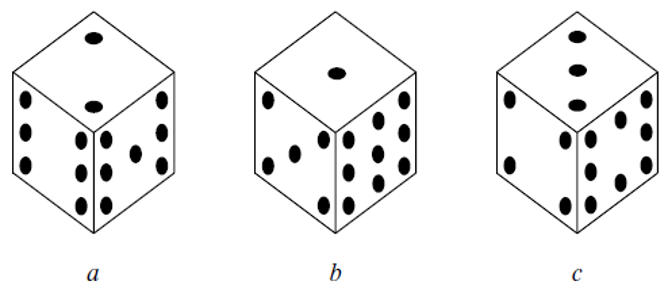
2. The number of dots on the 3 dice are different and the number on one face of each die is the same as the number on the opposite face.
3. Each of the two players selects one die and roll it once. The player with lower value loses.

Suppose that the two players, Alice and Bob, selected die $a$ and $b$, respectively. Below, we will simulate this game $n=10000$ times and estimate probabilities.

The class below creates a die, and an associated function roll, which returns the result of one roll of the die. To create the die, you pass in a list containing the number of dots on each side of the die. If you do not pass in anything, it defaults to a fair six sided die.

In [2]:
class die:
    '''class to simulate the rolling of a die'''
    
    def __init__(self, dots = [1, 2, 3, 4, 5, 6]):
        '''initialize the die'''
        self.dots = dots
    
    def roll(self):
        '''roll the die'''
        return random.choice(self.dots)

The following code creates a fair six sided die, and rolls it 10 times. Note that python starts indexing from 0, so range(10) returns a list of integers from 0 to 9.

In [3]:
# create fair die
fair_die = die()

# roll it 10 times
for i in range(10):
    print(f'The result of roll {i} is {fair_die.roll()}')

The result of roll 0 is 5
The result of roll 1 is 4
The result of roll 2 is 3
The result of roll 3 is 2
The result of roll 4 is 1
The result of roll 5 is 4
The result of roll 6 is 1
The result of roll 7 is 3
The result of roll 8 is 6
The result of roll 9 is 6


The following code creates Alice's and Bob's dice, rolls each die once, and checks whether Alice or Bob wins. You can re-run the cell several times to play multiple games.

In [4]:
#create Alice's and Bob's dice
Alice = die([2, 6, 7])
Bob = die([1, 5, 9])

# roll the dice
Alice_roll = Alice.roll()
Bob_roll = Bob.roll()

# print the results
print(f'Alice rolled {Alice_roll}.')
print(f'Bob rolled {Bob_roll}.')
if Alice_roll > Bob_roll:
    print ('Alice wins!')
else:
    print('Bob wins!')

Alice rolled 2.
Bob rolled 9.
Bob wins!


The following code plots the results of 30 rolls of Alice's and Bob's dice.

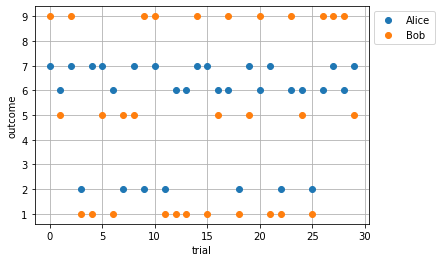

In [5]:
# roll each die 30 times
trials = range(30)
# method 1
Alice_rolls = []
for i in trials:
    Alice_rolls.append(Alice.roll())
# method 2
Bob_rolls = [Bob.roll() for i in trials]
# note there are many possible methods to do this

# create plot
fig, ax = plt.subplots() # create figure to hold plots
ax.plot(trials, Alice_rolls, 'o', label='Alice') # plot Alice's rolls
ax.plot(trials, Bob_rolls, 'o', label='Bob') # plot Bob's rolls

# label the plots
plt.xlabel('trial')
plt.ylabel('outcome')
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.show()

The following code rolls Alice's die 10,000 times, and computes the relative frequency of each of the three outcomes. Note that the resulting probabilities are all close to 1/3?

In [6]:
total = 10000 # total number of times to roll the die

# roll the die "total" times
trials = range(total)
rolls = [Alice.roll() for i in trials]

# the total number of outcomes is the number of faces with different dots
number_of_outcomes = np.size(Alice.dots)

# for each outcome
for i in range(number_of_outcomes):
    # count the number of times the outcome occurs
    count = np.sum( np.equal( rolls, Alice.dots[i] ) )
    # calculate the relative frequency
    rf = count/total
    # print result
    print(f'The relative frequency of the outcome {Alice.dots[i]} is {rf}.')

    

The relative frequency of the outcome 2 is 0.3388.
The relative frequency of the outcome 6 is 0.3357.
The relative frequency of the outcome 7 is 0.3255.


### Part a: Convergence of relative frequency
Generate plots of the relative frequencies of the three outcomes of Alice's die versus the number of trials, which ranges from 1 to 1000

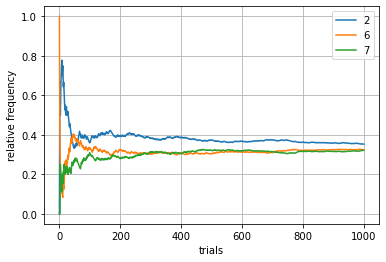

In [7]:
# put your code here

total = 1000
trials = range(total)
rolls = [Alice.roll() for i in trials]
number_of_outcomes = np.size(Alice.dots)
fig, ax = plt.subplots() # create figure to hold plots

for i in range(number_of_outcomes): 
    rf = np.divide(np.cumsum (np.equal(rolls, Alice.dots[i])), np.array(trials) + 1)
    if (i == 0):
        a = 2
    if (i == 1):
        a = 6
    if (i == 2): 
        a = 7
    ax.plot(trials, rf, label= a) 
    
# label the plots
plt.xlabel('trials')
plt.ylabel('relative frequency')
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.show()


### Part b: Play the game repeatedly.

Play the game 10,000 times and calculate the relative frequency that Alice wins. Who is more likely to win this game, Alice or Bob?

In [8]:
# your code below 
count = 0; 
total = 10000 # total number of times to roll the die

# roll the die "total" times
trials = range(total)
Alice_rolls = [Alice.roll() for i in trials]
Bob_rolls = [Bob.roll() for i in trials]

for i in range(total):
    count += (Alice.roll() > Bob.roll())
    rf = count/total
print(f'The relative frequency of Alice winning is {rf}.')
    


The relative frequency of Alice winning is 0.554.


# **Part b answer:** 

In [9]:
if rf > 0.5:
    print('Alice is more likely to win')
else: 
    print('Bob is more likely to win')

Alice is more likely to win


### Part c: Play the game with two die rolls.

Now assume that Alice and Bob both get two rolls of the die per game and add the two outcomes. The winner is whoever's sum is larger. 

Simulate this game 10,000 times and compute the relative frequency that Alice wins. Who is more likely to win this game, Alice or Bob?

In [10]:
# your code below

count = 0 
total = 10000 # total number of times to roll the die

# roll the die "total" times
trials = range(total)
Alice_rolls = [Alice.roll() for i in trials]
Bob_rolls = [Bob.roll() for i in trials]


for i in range(total):
    count += ((Alice.roll() + Alice.roll()) > (Bob.roll() + Bob.roll()))
    rf = count/total
print(f'The relative frequency of Alice winning is {rf}.')
    

The relative frequency of Alice winning is 0.4611.


**Part c answer:** 

In [11]:
if rf > 0.5:
    print('Alice is more likely to win')
else: 
    print('Bob is more likely to win')

Bob is more likely to win


In [14]:
R = [7, 2, 6, 7, 2, 7, 7, 6, 2, 6]
S = 6
O = np.divide( np.cumsum ( np.equal( R, S ) ), np.array(range(10))+1 )


print(f'The relative frequency of Alice winning is {O}.')

The relative frequency of Alice winning is [0.         0.         0.33333333 0.25       0.2        0.16666667
 0.14285714 0.25       0.22222222 0.3       ].
